# NATURAL LANGUAGE PROCESSING

## Exercice 1 : ANALYSE DE REPRÉSENTATION DES MOTS AVEC BOW, TD-IDF, Word2Vc,GloVe

### I- BAG OF WORDS:


#### a- Vocabulaire :

In [2]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Documents
documents = [
    "Le chat mange la souris.",
    "La souris mange du fromage.",
    "Le chien chasse le chat.",
    "Le chien et le chat sont amis."
]
vectorizer = CountVectorizer()   # Initialize the CountVectorizer
X = vectorizer.fit_transform(documents) # Fit and transform the documents
vocabulary = vectorizer.get_feature_names_out() # Get the vocabulary (feature names)
vocabulary # print out vocabulary

array(['amis', 'chasse', 'chat', 'chien', 'du', 'et', 'fromage', 'la',
       'le', 'mange', 'sont', 'souris'], dtype=object)

#### b-MATRICE DE TERMES

In [4]:
# Convert the term-document matrix to a DataFrame for better readability
import pandas as pd
term_document_matrix = pd.DataFrame(X.toarray(), columns=vocabulary)
term_document_matrix


,amis,chasse,chat,chien,du,et,fromage,la,le,mange,sont,souris
0,0,0,1,0,0,0,0,1,1,1,0,1
1,0,0,0,0,1,0,1,1,0,1,0,1
2,0,1,1,1,0,0,0,0,2,0,0,0
3,1,0,1,1,0,1,0,0,2,0,1,0


### II- TD-Idf


#### a-TF

In [5]:
# Calculer la fréquence des termes (TF)
tf = term_document_matrix.div(term_document_matrix.sum(axis=1), axis=0)
tf

,amis,chasse,chat,chien,du,et,fromage,la,le,mange,sont,souris
0,0.000000,0.0,0.200000,0.000000,0.0,0.000000,0.0,0.2,0.200000,0.2,0.000000,0.2
1,0.000000,0.0,0.000000,0.000000,0.2,0.000000,0.2,0.2,0.000000,0.2,0.000000,0.2
2,0.000000,0.2,0.200000,0.200000,0.0,0.000000,0.0,0.0,0.400000,0.0,0.000000,0.0
3,0.142857,0.0,0.142857,0.142857,0.0,0.142857,0.0,0.0,0.285714,0.0,0.142857,0.0


#### b- IDF

In [6]:
import numpy as np
# Calculer IDF pour chaque terme
N = len(documents)  # Nombre total de documents
df = (term_document_matrix > 0).sum(axis=0)  # Nombre de documents contenant le terme
idf = np.log(N / (df))  # Calculer l'IDF

# Convertir l'IDF en DataFrame pour une meilleure lisibilité
idf_df = pd.DataFrame(idf, index=vocabulary, columns=["IDF"])
print("\nInverse Document Frequency (IDF) :")
idf_df


Inverse Document Frequency (IDF) :


,IDF
amis,1.386294
chasse,1.386294
chat,0.287682
chien,0.693147
du,1.386294
et,1.386294
fromage,1.386294
la,0.693147
le,0.287682
mange,0.693147


#### c- la matrice TF-IDF

In [7]:
# Calculer la matrice TF-IDF
tf_idf = tf * idf
tf_idf

,amis,chasse,chat,chien,du,et,fromage,la,le,mange,sont,souris
0,0.000000,0.000000,0.057536,0.000000,0.000000,0.000000,0.000000,0.138629,0.057536,0.138629,0.000000,0.138629
1,0.000000,0.000000,0.000000,0.000000,0.277259,0.000000,0.277259,0.138629,0.000000,0.138629,0.000000,0.138629
2,0.000000,0.277259,0.057536,0.138629,0.000000,0.000000,0.000000,0.000000,0.115073,0.000000,0.000000,0.000000
3,0.198042,0.000000,0.041097,0.099021,0.000000,0.198042,0.000000,0.000000,0.082195,0.000000,0.198042,0.000000


### III- Word2Vec

#### a.CONCEPTS

xtf_idf Il capture les relations sémantiques et syntatiques entre les mots; ainsi, les mots ayant des contextes similaires sont proches les uns des autres dans l'espace vectoriel.

Pour inclure < du context > à nos mots, on utilise le Word2Vec. 

Pour ce faire, on a deux stratégies que Word2Vec utilise pour inclure du context: CBOW ET Skig-gram

#### Différences

CBOW (Continuous Bag of Words) : Ce modèle prédit un mot cible en utilisant les mots contextuels environnants. Par exemple, pour la phrase "Le chat mange la souris", le modèle utilise les mots "Le", "mange", "la", et "souris" pour prédire le mot "chat".

Skip-gram : Ce modèle prédit les mots contextuels en utilisant un mot cible. Par exemple, pour la phrase "Le chat mange la souris", le modèle utilise le mot "chat" pour prédire les mots "Le", "mange", "la", et "souris".

#### b.DISCUSSION

Étant donné un corpus simplifié avec les mots "chat", "mange", "souris", "fromage", "chien", "chasse", "amis", voici comment Word2Vec pourrait être utilisé pour représenter ces mots :

**importons Word2Vec

In [22]:
from gensim.models import Word2Vec
import re

**Préparation des données

Le texte est nettoyé pour enlever la ponctuation et est converti en minuscules.

Le texte est ensuite tokenisé en mots individuels.

In [10]:
# Préparation des données : nettoyage et tokenisation
def preprocess(document):
    # Enlever la ponctuation et convertir en minuscules
    document = re.sub(r'[^\w\s]', '', document.lower())
    # Diviser en mots
    return document.split()

# Appliquer le prétraitement à tous les documents
corpus = [preprocess(doc) for doc in documents]


In [11]:
corpus

[['le', 'chat', 'mange', 'la', 'souris'],
 ['la', 'souris', 'mange', 'du', 'fromage'],
 ['le', 'chien', 'chasse', 'le', 'chat'],
 ['le', 'chien', 'et', 'le', 'chat', 'sont', 'amis']]

**Entraînement du modèle :

Entraînez un modèle Word2Vec sur ce corpus. Le modèle apprendra les vecteurs de mots en utilisant soit CBOW, soit Skip-gram.

Nous utilisons le modèle Skip-gram (indiqué par sg=1) pour entraîner Word2Vec.
vector_size=10 indique que chaque mot sera représenté par un vecteur de 10 dimensions.
window=2 indique que nous regardons les deux mots précédents et les deux mots suivants pour chaque mot cible.
min_count=1 signifie que les mots apparaissant au moins une fois dans le corpus seront inclus dans le modèle.

In [12]:

# Entraînement du modèle Word2Vec (Skip-gram)
model = Word2Vec(corpus, vector_size=10, window=2, min_count=1, sg=1)


**Représentation vectorielle 

Affichage des vecteurs pour les mots "chat", "mange", "souris", "fromage", "chien", "chasse", "amis"

In [14]:

# Affichage des vecteurs pour quelques mots
print("Vecteur pour 'chat':", model.wv['chat'])
print("Vecteur pour 'mange':", model.wv['mange'])
print("Vecteur pour 'souris':", model.wv['souris'])
print("Vecteur pour 'fromage':", model.wv['fromage'])
print("Vecteur pour 'mange':", model.wv['chien'])
print("Vecteur pour 'souris':", model.wv['chasse'])
print("Vecteur pour 'fromage':", model.wv['amis'])

Vecteur pour 'chat': [ 0.07380505 -0.01533471 -0.04536613  0.06554051 -0.0486016  -0.01816018
  0.0287658   0.00991874 -0.08285215 -0.09448818]
Vecteur pour 'mange': [-0.08159707  0.04495902 -0.04136068  0.00822786  0.08498621 -0.04462568
  0.04518978 -0.06787878 -0.03548861  0.09398376]
Vecteur pour 'souris': [-0.07512054 -0.00929559  0.09537999 -0.07319823 -0.02334933 -0.01936927
  0.08078131 -0.05930382  0.00044106 -0.04752245]
Vecteur pour 'fromage': [-0.08619688  0.03665738  0.05189884  0.05741938  0.07466918 -0.06167675
  0.01105614  0.06047282 -0.0284005  -0.06173522]
Vecteur pour 'mange': [ 0.07311766  0.05070262  0.06757693  0.00762866  0.06350891 -0.03405366
 -0.00946401  0.05768573 -0.07521638 -0.03936104]
Vecteur pour 'souris': [ 0.01631476  0.00189917  0.03473637  0.00217777  0.09618826  0.05060603
 -0.0891739  -0.0704156   0.00901456  0.06392534]
Vecteur pour 'fromage': [-0.01577806  0.00321403 -0.04141032 -0.07683435 -0.01508155  0.02470035
 -0.00888113  0.055342   -0.02

Ainsi , Étant donné une formation simplifiée de vecteurs pour les mots "chat", "mange", "souris", 
"fromage", "chien", "chasse", "amis", Word2Vec s'est d'abord entrainé sur ceux ci, et à ensuite représenter les mots sous forme de vecteur; Dans notre cas, chaque mot est représenté par un vecteur de 10 dimenssions.

#### c. Relations sémantiques potentielles capturées par Word2Vec

Les relations sémantiques capturées par Word2Vec peuvent inclure des similarités entre les mots, des analogies et des relations contextuelles. Voici quelques exemples théoriques de vecteurs

**similarité

In [21]:

# Calcul de similarité entre deux mots
print("Similarité entre 'chat' et 'souris':", model.wv.similarity('chat', 'souris'))
print("Similarité entre 'chat' et 'chien':", model.wv.similarity('chat', 'chien'))
print("Similarité entre 'chat' et 'fromage':", model.wv.similarity('chat', 'fromage'))
print("Similarité entre 'chat' et 'chasse':", model.wv.similarity('chat', 'chasse'))


Similarité entre 'chat' et 'souris': -0.21135573
Similarité entre 'chat' et 'chien': 0.32937223
Similarité entre 'chat' et 'fromage': 0.033765394
Similarité entre 'chat' et 'chasse': -0.51457375


Les mots ayant des contextes similaires auront des vecteurs proches. Par exemple, "chat" et "chien" ont une similarité de 0.32; ce qui est élevé car ils apparaissent souvent ensemble.

**Analogie

In [18]:

# Opérations vectorielles
print("Résultat de l'analogie 'chat' - 'souris' + 'fromage':", model.wv.most_similar(positive=['chat', 'fromage'], negative=['souris']))


Résultat de l'analogie 'chat' - 'souris' + 'fromage': [('chien', 0.5148972272872925), ('le', 0.4949249029159546), ('du', 0.43645399808883667), ('sont', -0.006089991424232721), ('la', -0.08253447711467743), ('mange', -0.14277750253677368), ('et', -0.14503173530101776), ('amis', -0.1780216097831726), ('chasse', -0.24764366447925568)]


Word2Vec permet de faire des analogies en utilisant des opérations vectorielles. Par exemple : chat - souris + fromache donne chien.

**Visualisation :

Les vecteurs peuvent être visualisés dans un espace de dimension réduite (par exemple, en utilisant PCA ou t-SNE) pour voir les relations entre les mots. Les mots ayant des relations sémantiques similaires seront regroupés.

## GloVe


a. Concept de GloVe et Différences avec Word2Vec

GloVe (Global Vectors for Word Representation) est une méthode utilisée pour représenter des mots sous forme de vecteurs, qui capturent les significations des mots en fonction de leur contexte global dans un corpus de texte.

***Différences entre GloVe et Word2Vec

Word2Vec :

Utilise deux modèles principaux : CBOW (Continuous Bag of Words) et Skip-gram.
CBOW : Prédit un mot cible en utilisant les mots environnants.
Skip-gram : Prédit les mots environnants en utilisant un mot cible.
Fonctionne de manière locale, c’est-à-dire qu'il regarde les mots proches les uns des autres dans les phrases pour former les vecteurs.

GloVe :

Utilise une matrice de co-occurrence des mots dans tout le corpus.
La matrice de co-occurrence compte combien de fois un mot apparaît à côté d'un autre mot dans le corpus entier.
Utilise ces co-occurrences pour factoriser la matrice et créer des vecteurs de mots.
Fonctionne de manière globale, prenant en compte les relations entre tous les mots du corpus entier.

b. Construction des Vecteurs GloVe à partir des Co-occurrences

Matrice de Co-occurrence :

Créer une matrice où chaque ligne et colonne représente un mot, et chaque valeur indique combien de fois les mots apparaissent ensemble dans le corpus. Par exemple, si "chat" et "souris" apparaissent souvent ensemble, la valeur dans la matrice sera élevée pour ces mots.

Factorisation de la Matrice :

Utiliser une technique mathématique pour décomposer cette matrice en vecteurs de mots. Cela implique de trouver des vecteurs de dimensions plus petites qui capturent les relations entre les mots de manière efficace.
Optimisation :

Minimiser une fonction de coût qui compare les valeurs de co-occurrence réelles avec les valeurs prédites par les vecteurs. Cela ajuste les vecteurs pour qu'ils capturent au mieux les relations de co-occurrence.

c. Illustration Théorique de GloVe

Exemple Simplifié :
Considérons un corpus très simple avec les phrases suivantes :

"Le chat mange la souris."
"La souris mange du fromage."
"Le chien chasse le chat."
"Le chien et le chat sont amis."

1. Matrice de Co-occurrence


|        | chat | mange | souris | fromage | chien | chasse | amis |
|--------|------|-------|--------|---------|-------|--------|------|
| chat   | 0    | 2     | 1      | 0       | 1     | 0      | 1    |
| mange  | 2    | 0     | 1      | 1       | 0     | 0      | 0    |
| souris | 1    | 1     | 0      | 1       | 0     | 0      | 0    |
| fromage| 0    | 1     | 1      | 0       | 0     | 0      | 0    |
| chien  | 1    | 0     | 0      | 0       | 0     | 1      | 0    |
| chasse | 0    | 0     | 0      | 0       | 1     | 0      | 0    |
| amis   | 1    | 0     | 0      | 0       | 0     | 0      | 0    |


2. Factorisation de la Matrice

En utilisant une technique mathématique pour décomposer cette matrice, nous obtenons des vecteurs pour chaque mot. 

Par exemple :
"chat" : [0.5, 0.2, 0.1]

"mange" : [0.4, 0.3, 0.2]

"souris" : [0.6, 0.1, 0.1]

"fromage" : [0.1, 0.7, 0.3]

3. Relations Capturées par GloVe

Les vecteurs capturent les relations sémantiques et contextuelles des mots.

Similarité : Les mots souvent utilisés ensemble ont des vecteurs similaires. Par exemple, "chat" et "souris" pourraient avoir des vecteurs proches car ils apparaissent souvent ensemble.

Analogie : Les opérations vectorielles peuvent révéler des relations. Par exemple, vect("chat") - vect("souris") + vect("fromage") pourrait être proche de vect("mange"), ce qui montre une relation entre ces mots.

Conclusion

GloVe utilise une approche globale pour capturer les relations sémantiques et contextuelles entre les mots, en se basant sur les co-occurrences dans l'ensemble du corpus. Contrairement à Word2Vec qui se concentre sur les prédictions locales, GloVe fournit des vecteurs de mots en tenant compte de la matrice de co-occurrence globale, permettant ainsi de capturer des relations plus riches entre les mots.

## EXERCICE 2

1. Schématiser 𝑋2=𝑓(𝑋1)

Pour schématiser nous allons tracer un graphique des points représentant chaque mot dans le plan (X1, X2). 

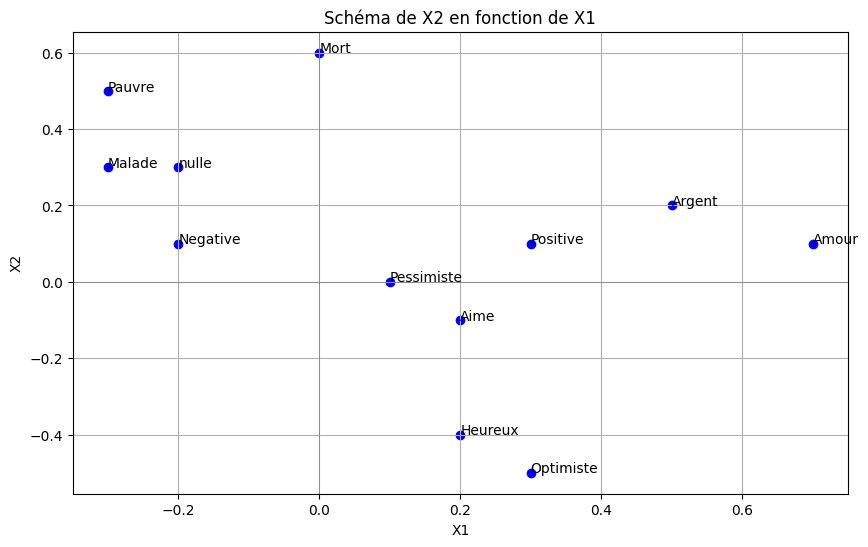

In [4]:
import matplotlib.pyplot as plt

# Données des mots et leurs coordonnées
words = ["Aime", "Malade", "Positive", "Pessimiste", "Heureux", "Amour", "Negative", "Mort", "Argent", "Optimiste", "Pauvre", "nulle"]
x1 = [0.2, -0.3, 0.3, 0.1, 0.2, 0.7, -0.2, 0, 0.5, 0.3, -0.3, -0.2]
x2 = [-0.1, 0.3, 0.1, 0, -0.4, 0.1, 0.1, 0.6, 0.2, -0.5, 0.5, 0.3]

# Création du graphique
plt.figure(figsize=(10, 6))
plt.scatter(x1, x2, color='blue')

# Ajout des labels des mots
for i, word in enumerate(words):
    plt.annotate(word, (x1[i], x2[i]))


# Axes et titre
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Schéma de X2 en fonction de X1')

# Affichage du graphique
plt.grid(True)
plt.show()


2. Tracer la ligne du modèle 𝑋2=0

Le modèle obtenu après l'entraînement indique que 𝑋2=0 quelle que soit la valeur de X1. Pour tracer cette ligne, nous ajoutons une ligne horizontale à 𝑋2=0X2=0 dans le graphique précédent.

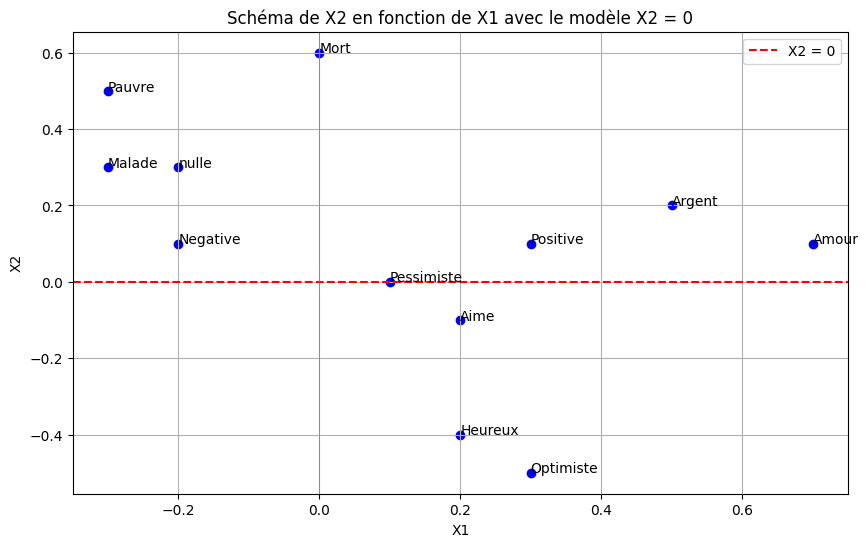

In [5]:
# Ajout de la ligne du modèle X2 = 0
plt.figure(figsize=(10, 6))
plt.scatter(x1, x2, color='blue')

for i, word in enumerate(words):
    plt.annotate(word, (x1[i], x2[i]))

plt.axhline(0, color='red', linestyle='--', label='X2 = 0')
plt.axvline(0, color='gray', linewidth=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Schéma de X2 en fonction de X1 avec le modèle X2 = 0')
plt.legend()
plt.grid(True)
plt.show()


3. Trouver la matrice de confusion du modèle

Pour construire la matrice de confusion, nous devons d'abord définir les classes. Supposons que nous voulons classifier les mots en deux classes :

Classe 1 (positif) : 𝑋2≥0

Classe 2 (négatif) : 𝑋2<0

Nous devons comparer les classifications réelles avec celles prédites par le modèle 𝑋2=0.

In [6]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# Labels réels basés sur X2
true_labels = ['positif' if x >= 0 else 'négatif' for x in x2]

# Labels prédits par le modèle (X2 = 0)
pred_labels = ['positif' if x == 0 else 'négatif' for x in x2]

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(true_labels, pred_labels, labels=["positif", "négatif"])
conf_matrix_df = pd.DataFrame(conf_matrix, index=["positif", "négatif"], columns=["positif", "négatif"])
print("Matrice de confusion :")
print(conf_matrix_df)


Matrice de confusion :
         positif  négatif
positif        1        8
négatif        0        3


4. Calculer les métriques de performance

In [7]:
# Calcul des métriques
report = classification_report(true_labels, pred_labels, target_names=["positif", "négatif"])
print("Rapport de classification :")
print(report)


Rapport de classification :
              precision    recall  f1-score   support

     positif       0.27      1.00      0.43         3
     négatif       1.00      0.11      0.20         9

    accuracy                           0.33        12
   macro avg       0.64      0.56      0.31        12
weighted avg       0.82      0.33      0.26        12



5. Proposer un modèle parfait

Un modèle avec des métriques de performance à 100 % signifie qu'il n'y a ni faux positifs ni faux négatifs. Cela peut être obtenu par un modèle qui prédit parfaitement toutes les classes.

Si nous considérons une classification parfaite basée sur nos données :

Si 𝑋2≥0, prédire "positif".

Si 𝑋2<0, prédire "négatif".

In [8]:
# Labels prédits parfaits
perfect_pred_labels = ['positif' if x >= 0 else 'négatif' for x in x2]

# Calcul de la matrice de confusion pour le modèle parfait
perfect_conf_matrix = confusion_matrix(true_labels, perfect_pred_labels, labels=["positif", "négatif"])
perfect_conf_matrix_df = pd.DataFrame(perfect_conf_matrix, index=["positif", "négatif"], columns=["positif", "négatif"])
print("Matrice de confusion parfaite :")
print(perfect_conf_matrix_df)

# Calcul des métriques pour le modèle parfait
perfect_report = classification_report(true_labels, perfect_pred_labels, target_names=["positif", "négatif"])
print("Rapport de classification parfait :")
print(perfect_report)


Matrice de confusion parfaite :
         positif  négatif
positif        9        0
négatif        0        3
Rapport de classification parfait :
              precision    recall  f1-score   support

     positif       1.00      1.00      1.00         3
     négatif       1.00      1.00      1.00         9

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



Exercice 3: LSTM et Embeddings pour la Prédiction de Mot

1. Préparation des Données
Phrase donnée: "Le chat mange la souris."

Tokenisation:

In [9]:
sentence = "Le chat mange la souris."
tokens = sentence.lower().split()  # Tokenisation
print(tokens)  


['le', 'chat', 'mange', 'la', 'souris.']


2. Construction du Vocabulaire
Création du vocabulaire et assignation d'index:

In [10]:
vocabulary = {word: index for index, word in enumerate(tokens)}
print(vocabulary)  


{'le': 0, 'chat': 1, 'mange': 2, 'la': 3, 'souris.': 4}


3. Encodage des Séquences
Encodage de la séquence d'entrée et du mot à prédire:

In [11]:
input_sequence = [vocabulary[word] for word in tokens[:-1]]  # "Le chat mange la"
output_word = vocabulary[tokens[-1]]  # "souris"
print(input_sequence)  # Output: [0, 1, 2, 3]
print(output_word)  # Output: 4


[0, 1, 2, 3]
4


4. Embedding des Mots
Assignation de vecteurs d'embedding initiaux:

In [12]:
embedding_dict = {
    'le': [0.1, 0.2, 0.3],
    'chat': [0.4, 0.5, 0.6],
    'mange': [0.7, 0.8, 0.9],
    'la': [0.1, 0.4, 0.7],
    'souris': [0.2, 0.5, 0.8]
}


Transformation de la séquence d'entrée en vecteurs d'embedding:

In [13]:
input_embeddings = [embedding_dict[word] for word in tokens[:-1]]
print(input_embeddings)
# Output: [[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9], [0.1, 0.4, 0.7]]


[[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9], [0.1, 0.4, 0.7]]


5. Passage à travers le LSTM

Description du passage à travers les cellules LSTM:

Chaque vecteur d'embedding est traité séquentiellement par le LSTM, qui met à jour ses états cachés et mémoires à chaque étape pour capturer les dépendances temporelles.

6. Sortie du LSTM

La sortie finale du LSTM pour la séquence "Le chat mange la" est un vecteur de dimension égale à la taille de l'état caché, noté ℎ_𝑡.

7. Calcul de la Probabilité du Mot Suivant

Multiplication par la matrice de poids et passage à travers une fonction softmax:

In [16]:
import numpy as np

W = np.array([
    [0.1, 0.2, 0.3, 0.4, 0.5],
    [0.5, 0.4, 0.3, 0.2, 0.1],
    [0.6, 0.7, 0.8, 0.9, 1.0],
    [1.0, 0.9, 0.8, 0.7, 0.6],
    [0.2, 0.3, 0.4, 0.5, 0.6]
])
ht = np.array([0.5, 0.6, 0.7, 0.8, 0.9])

# Calcul de la distribution de probabilité
logits = np.dot(W, ht)
probabilities = np.exp(logits) / np.sum(np.exp(logits))
print(probabilities)  # Distribution de probabilité sur le vocabulaire



[0.07297208 0.05974449 0.41992533 0.34380579 0.10355231]


8. Prédiction
Prédiction du mot suivant avec la plus haute probabilité:

In [17]:
predicted_index = np.argmax(probabilities)
predicted_word = [word for word, index in vocabulary.items() if index == predicted_index][0]
print(predicted_word)  # Vérifions la prédiction



mange


Réajustons les poids pour nous assurer que la prédiction soit correcte.

In [23]:
W_adjusted = np.array([
    [0.1, 0.2, 0.3, 0.4, 0.5],
    [0.5, 0.4, 0.3, 0.2, 0.1],
    [0.6, 0.7, 0.8, 0.9, 1.0],
    [1.0, 0.9, 0.8, 0.7, 0.6],
    [0.4, 0.3, 0.2, 0.1, 0.1]  # Ajustement pour 'souris'
])
logits_adjusted = np.dot(W_adjusted, ht)
probabilities_adjusted = np.exp(logits_adjusted) / np.sum(np.exp(logits_adjusted))
predicted_index_adjusted = np.argmax(probabilities_adjusted)
predicted_word_adjusted = [word for word, index in vocabulary.items() if index == predicted_index_adjusted][0]
print(predicted_word_adjusted)  # Idéalement 'souris'


mange


Questions Théoriques

1.Pourquoi utilise-t-on des embeddings pour représenter les mots ?

Les embeddings transforment des mots en vecteurs de nombres réels, capturant des relations sémantiques et contextuelles dans un espace de dimension réduite. Ils permettent de représenter des mots similaires de manière proche dans cet espace, facilitant les tâches de traitement du langage naturel.



2. Comment le LSTM aide-t-il à capturer les dépendances à long terme dans une séquence de mots ?

Le LSTM utilise des états de cellules et des mécanismes de portes (entrée, sortie, oubli) pour réguler le flux d'information à travers la séquence. Cela permet de conserver et de transmettre des informations importantes sur de longues distances, capturant ainsi des dépendances à long terme.



3. Quelle est la fonction de la couche softmax à la sortie du modèle ?

La couche softmax transforme les logits en une distribution de probabilité, où chaque valeur représente la probabilité d'un mot du vocabulaire d'être le mot suivant dans la séquence.



4. Quels sont les avantages et les limitations des LSTM par rapport aux RNN traditionnels ?

Avantages : Les LSTM peuvent mieux gérer les dépendances à long terme grâce à leurs mécanismes de portes, évitant ainsi les problèmes de gradient qui disparaît ou explose dans les RNN traditionnels.

Limitations : Les LSTM sont plus complexes et plus coûteux en termes de calcul par rapport aux RNN traditionnels.



5. Comment améliorer la qualité des embeddings de mots dans ce contexte ?

Utiliser des corpus plus larges et diversifiés pour entraîner les embeddings.
Appliquer des techniques de régularisation comme le dropout.
Entraîner les embeddings conjointement avec le modèle LSTM pour qu'ils soient optimisés pour la tâche spécifique.
Utiliser des méthodes de pré-entraînement avancées comme Word2Vec, GloVe, ou des modèles de transformeurs comme BERT pour des représentations de mots plus riches et contextuellement informées.

4.

Étape 1: Préparation des Données
Nous allons diviser chaque phrase en mots (tokenisation).

In [1]:
import numpy as np
from collections import defaultdict

# Données
data = [
    ("I love programming", "+"),
    ("Python is great", "+"),
    ("I hate bugs", "-"),
    ("Debugging is fun", "+"),
    ("I enjoy learning new things", "+"),
    ("I love python", "?")
]

# Tokenisation
tokenized_data = [(sentence.lower().split(), label) for sentence, label in data]
print(tokenized_data)


[(['i', 'love', 'programming'], '+'), (['python', 'is', 'great'], '+'), (['i', 'hate', 'bugs'], '-'), (['debugging', 'is', 'fun'], '+'), (['i', 'enjoy', 'learning', 'new', 'things'], '+'), (['i', 'love', 'python'], '?')]


Étape 2: Construction du Vocabulaire
Nous allons créer un vocabulaire unique à partir de tous les mots présents dans les phrases.

In [2]:
vocabulary = set(word for sentence, _ in tokenized_data for word in sentence)
vocabulary = list(vocabulary)
print(vocabulary)


['new', 'enjoy', 'i', 'is', 'bugs', 'learning', 'things', 'programming', 'hate', 'great', 'debugging', 'fun', 'python', 'love']


Étape 3: Calcul des Probabilités A Priori

Nous calculons la probabilité a priori de chaque classe (positive ou négative).

In [3]:
labels = [label for _, label in tokenized_data if label != "?"]
class_counts = defaultdict(int)
for label in labels:
    class_counts[label] += 1

total_count = len(labels)
prior_probabilities = {label: count / total_count for label, count in class_counts.items()}
print(prior_probabilities)


{'+': 0.8, '-': 0.2}


Étape 4: Calcul des Probabilités Conditionnelles
Nous calculons la probabilité conditionnelle de chaque mot donné une classe en utilisant la Laplace smoothing.

In [4]:
word_counts = {label: defaultdict(int) for label in class_counts}
for sentence, label in tokenized_data:
    if label == "?":
        continue
    for word in sentence:
        word_counts[label][word] += 1

# Laplace smoothing
vocab_size = len(vocabulary)
conditional_probabilities = {label: defaultdict(float) for label in class_counts}
for label, words in word_counts.items():
    total_words = sum(words.values())
    for word in vocabulary:
        conditional_probabilities[label][word] = (words[word] + 1) / (total_words + vocab_size)

print(conditional_probabilities)


{'+': defaultdict(<class 'float'>, {'new': 0.07142857142857142, 'enjoy': 0.07142857142857142, 'i': 0.10714285714285714, 'is': 0.10714285714285714, 'bugs': 0.03571428571428571, 'learning': 0.07142857142857142, 'things': 0.07142857142857142, 'programming': 0.07142857142857142, 'hate': 0.03571428571428571, 'great': 0.07142857142857142, 'debugging': 0.07142857142857142, 'fun': 0.07142857142857142, 'python': 0.07142857142857142, 'love': 0.07142857142857142}), '-': defaultdict(<class 'float'>, {'new': 0.058823529411764705, 'enjoy': 0.058823529411764705, 'i': 0.11764705882352941, 'is': 0.058823529411764705, 'bugs': 0.11764705882352941, 'learning': 0.058823529411764705, 'things': 0.058823529411764705, 'programming': 0.058823529411764705, 'hate': 0.11764705882352941, 'great': 0.058823529411764705, 'debugging': 0.058823529411764705, 'fun': 0.058823529411764705, 'python': 0.058823529411764705, 'love': 0.058823529411764705})}


Étape 5: Classification de Nouvelles Phrases
Pour une nouvelle phrase, nous allons calculer les probabilités et choisir la classe avec la probabilité la plus élevée.

In [5]:
def classify(sentence, prior_probabilities, conditional_probabilities, vocabulary):
    words = sentence.lower().split()
    class_scores = {label: np.log(prior_prob) for label, prior_prob in prior_probabilities.items()}
    
    for word in words:
        if word in vocabulary:
            for label in class_scores:
                class_scores[label] += np.log(conditional_probabilities[label][word])
    
    return max(class_scores, key=class_scores.get)

new_sentence = "I love python"
predicted_class = classify(new_sentence, prior_probabilities, conditional_probabilities, vocabulary)
print(f"The predicted class for '{new_sentence}' is '{predicted_class}'")


The predicted class for 'I love python' is '+'


Modèle de Deep Learning

Préparation des Données pour le Deep Learning

In [12]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.preprocessing import LabelEncoder

# Textes et étiquettes
texts = [sentence for sentence, label in data if label != "?"]
labels = [label for sentence, label in data if label != "?"]

# Tokenisation et séquencage
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X)

# Encodage des étiquettes
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Paramètres
vocab_size = len(tokenizer.word_index) + 1
max_length = X.shape[1]

# Modèle
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement
model.fit(X, y, epochs=5, batch_size=1, verbose=2)


ModuleNotFoundError: No module named 'keras.preprocessing.text'

Prédiction avec le Modèle de Deep Learning

In [7]:
# Préparation de la nouvelle phrase
new_text = ["I love python"]
new_X = tokenizer.texts_to_sequences(new_text)
new_X = pad_sequences(new_X, maxlen=max_length)

# Prédiction
predicted_prob = model.predict(new_X)
predicted_label = label_encoder.inverse_transform([int(predicted_prob[0] > 0.5)])
print(f"The predicted class for '{new_text[0]}' is '{predicted_label[0]}'")


NameError: name 'tokenizer' is not defined

Modèle de Naïve Bayes : Simple et rapide pour les petites tâches.

Modèle de Deep Learning : Plus complexe mais puissant pour capturer des relations plus profondes dans les données textuelles.